In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/users/prave/datasets/csv files/articles_data.csv")
df.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


# dataset exploration

In [3]:
df.shape

(10437, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10437.0,5218.000000,3013.046714,0.0,2609.0,5218.0,7827.0,10436.0
top_article,10435.0,0.122089,0.327404,0.0,0.0,0.0,0.0,1.0
engagement_reaction_count,10319.0,381.395290,4433.344792,0.0,0.0,1.0,43.0,354132.0
engagement_comment_count,10319.0,124.032949,965.351188,0.0,0.0,0.0,12.0,48490.0
engagement_share_count,10319.0,196.236263,1020.680229,0.0,1.0,8.0,47.5,39422.0
engagement_comment_plugin_count,10319.0,0.011629,0.268276,0.0,0.0,0.0,0.0,15.0


In [6]:
df.dtypes

Unnamed: 0                           int64
source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

# Data cleaning & Preprocessing

In [7]:
# Remove unwanted columns form the dataset
df.drop(['Unnamed: 0','url','url_to_image','source_id'],axis=1,inplace=True)

In [8]:
# renaming the columns names
columns=['source_name', 'author', 'title', 'description', 'published_at',
       'content', 'top_article', 'reaction_count',
       'comment_count', 'share_count',
       'comment_plugin_count']
df.columns=columns

In [9]:
df.head(3)

,source_name,author,title,description,published_at,content,top_article,reaction_count,comment_count,share_count,comment_plugin_count
0,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN


In [10]:
(df.isna().sum().sort_values(ascending=False))/len(df)*100

content                 12.379036
author                   9.772923
reaction_count           1.130593
comment_count            1.130593
share_count              1.130593
comment_plugin_count     1.130593
description              0.229951
title                    0.019163
top_article              0.019163
published_at             0.009581
source_name              0.000000
dtype: float64

In [11]:
# removing "content" column. Because we got lot of nan values 
df.drop('content',axis=1,inplace=True)

In [12]:
# imputting nan values
df['reaction_count'].fillna(0,inplace=True)
df['share_count'].fillna(0,inplace=True)
df['comment_plugin_count'].fillna(0,inplace=True)
df['comment_count'].fillna(0,inplace=True)

df['published_at'].fillna(df['published_at'].mode(),inplace=True)
df['top_article'].fillna(df['top_article'].mode(),inplace=True)

# dropping nan values
df=df.dropna()
df=df.reset_index()

In [13]:
df.shape

(9404, 11)

**Note :** The articles from the above dataset are taken in between **September - October** month of **2019** Year

In [14]:
# drop "Published_at" column 
df.drop('published_at',axis=1,inplace=True)

In [15]:
# dropping 'author' columns.
# Because, their is a lot of glitches in this feature like,we encountered source name,links,emial Ids ,etc..
df.drop('author',axis=1,inplace=True)

In [16]:
# dropping the "top_article" column.
# Because, even though comment,share,reaction are Zero count, some article are considered has top_articel.
df.drop('top_article',axis=1,inplace=True)

In [17]:
df.head()

,index,source_name,title,description,reaction_count,comment_count,share_count,comment_plugin_count
0,0,Reuters,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,0.0,0.0,2528.0,0.0
1,1,The Irish Times,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,6.0,10.0,2.0,0.0
2,2,The Irish Times,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,0.0,0.0,0.0,0.0
3,3,Al Jazeera English,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,0.0,0.0,7.0,0.0
4,4,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",0.0,0.0,0.0,0.0


In [18]:
reaction=df.groupby(['source_name'])['reaction_count'].sum().reset_index().sort_values(by='reaction_count',ascending=False)
reaction

,source_name,reaction_count
5,CNN,1187659.0
10,The New York Times,644308.0
2,BBC News,516902.0
4,CBS News,459741.0
0,ABC News,342936.0
3,Business Insider,216545.0
1,Al Jazeera English,139320.0
7,Newsweek,93167.0
11,The Wall Street Journal,81949.0
9,The Irish Times,26135.0


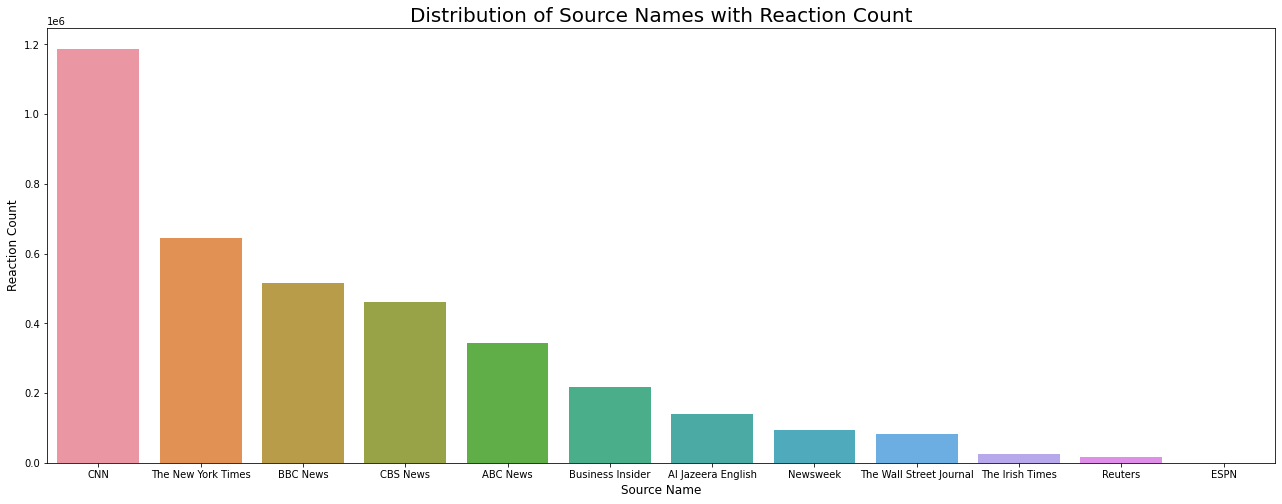

In [19]:
plt.figure(figsize=(22,8))
sns.barplot(x=reaction['source_name'],y=reaction['reaction_count'])
plt.title('Distribution of Source Names with Reaction Count',fontsize=20)
plt.xlabel('Source Name',fontsize=12)
plt.ylabel('Reaction Count',fontsize=12)
plt.show()

**Insight:**     
* **CNN** has the highest reaction count     
* shockingly , **ESPN** has **Zero** reaction count,genrally  ESPN is a **Sports News** channel. so,from this can get to know that people are showing interest in other things rather than sports.

In [20]:
comment=df.groupby(['source_name'])['comment_count'].sum().reset_index().sort_values(by='comment_count',ascending=False)
comment

,source_name,comment_count
5,CNN,333693.0
2,BBC News,196855.0
10,The New York Times,183380.0
4,CBS News,170960.0
0,ABC News,102573.0
3,Business Insider,101292.0
1,Al Jazeera English,45820.0
11,The Wall Street Journal,39042.0
7,Newsweek,32426.0
9,The Irish Times,10253.0


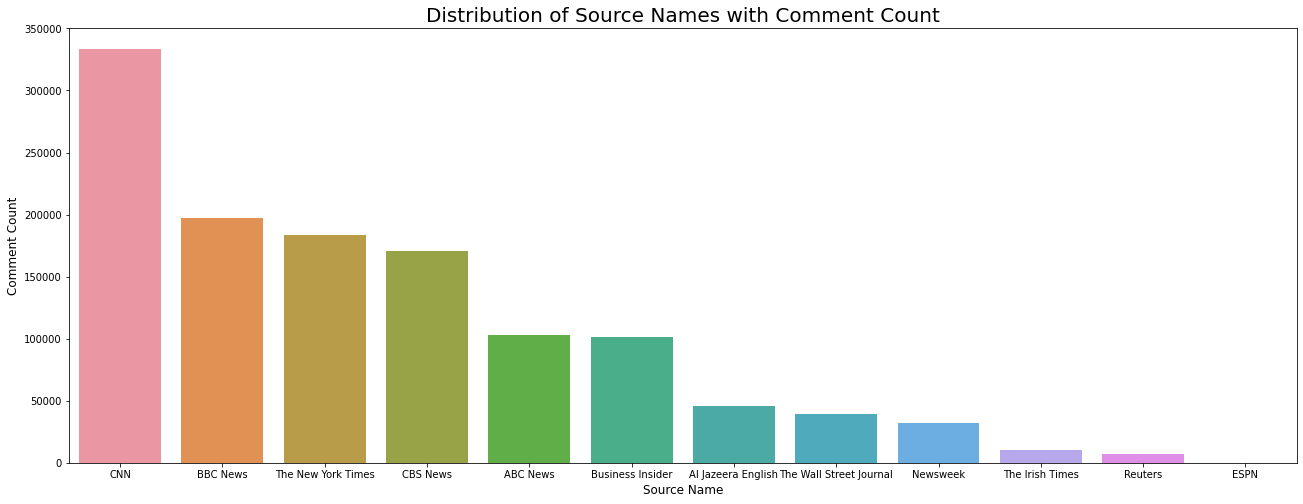

In [21]:
plt.figure(figsize=(22,8))
sns.barplot(x='source_name',y='comment_count',data=comment)
plt.title('Distribution of Source Names with Comment Count',fontsize=20)
plt.xlabel('Source Name',fontsize=12)
plt.ylabel('Comment Count',fontsize=12)
plt.show()

In [22]:
share=df.groupby('source_name')['share_count'].sum().reset_index().sort_values(by='share_count',ascending=False)
share

,source_name,share_count
8,Reuters,647095.0
3,Business Insider,311678.0
5,CNN,305190.0
10,The New York Times,208337.0
2,BBC News,193389.0
4,CBS News,108152.0
0,ABC News,82335.0
1,Al Jazeera English,35266.0
11,The Wall Street Journal,32010.0
7,Newsweek,29067.0


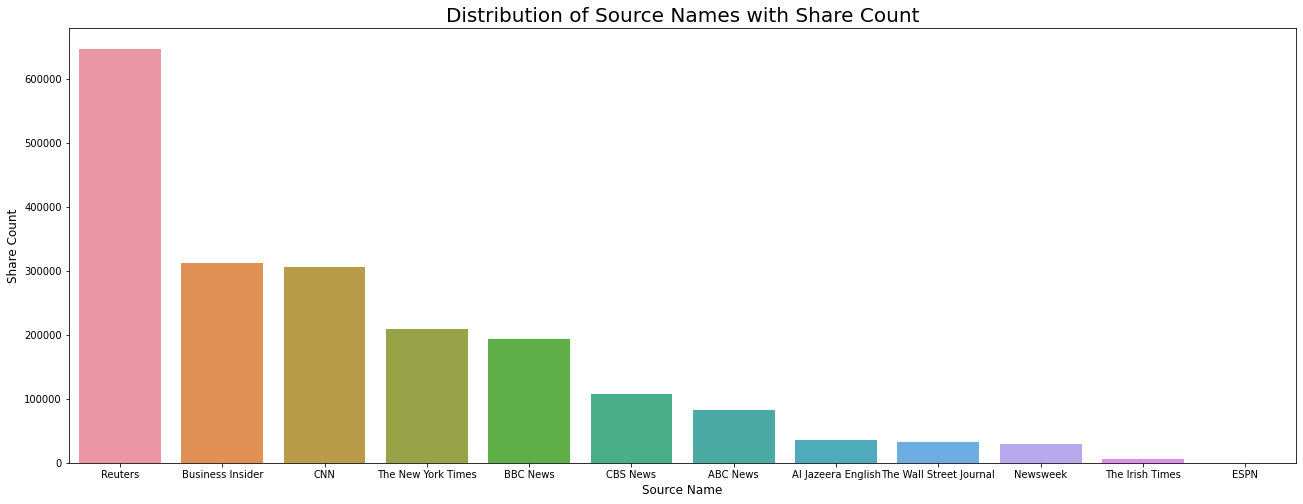

In [23]:
plt.figure(figsize=(22,8))
sns.barplot(x='source_name',y='share_count',data=share)
plt.title('Distribution of Source Names with Share Count',fontsize=20)
plt.xlabel('Source Name',fontsize=12)
plt.ylabel('Share Count',fontsize=12)
plt.show()

**Insight:**        
* **Reuters** has highest share count. that means, I personally feels that article might be **Viral** or **Rumors** about famous person      

In [24]:
comment_plugin=df.groupby('source_name')['comment_plugin_count'].sum().reset_index().sort_values(by='comment_plugin_count',
                                                                                                 ascending=False)
comment_plugin

,source_name,comment_plugin_count
3,Business Insider,80.0
5,CNN,30.0
1,Al Jazeera English,9.0
0,ABC News,1.0
2,BBC News,0.0
4,CBS News,0.0
6,ESPN,0.0
7,Newsweek,0.0
8,Reuters,0.0
9,The Irish Times,0.0


**Insight:**        
* **Business Insider** has most comment_plugin_count           


# Word cloud         
<!--  -->         
To know on which topic they are focusing

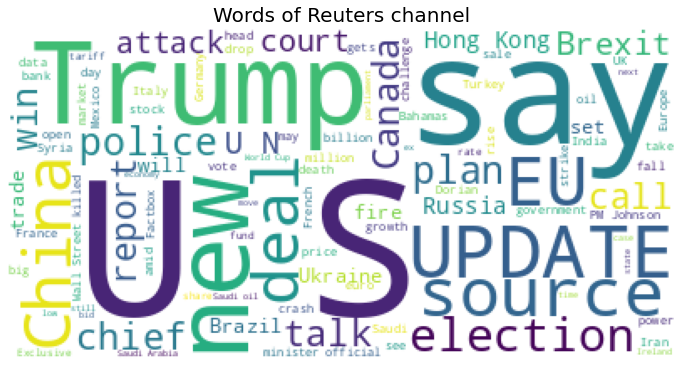

In [62]:
# Ret=uters channel
from wordcloud import WordCloud
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='Reuters','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of Reuters channel",fontsize=20)
plt.show()

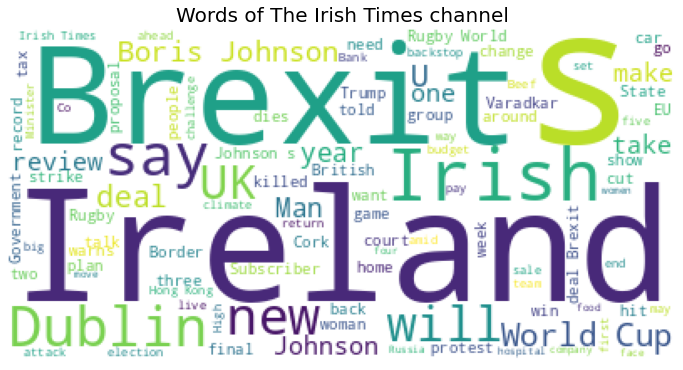

In [64]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='The Irish Times','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of The Irish Times channel",fontsize=20)
plt.show()

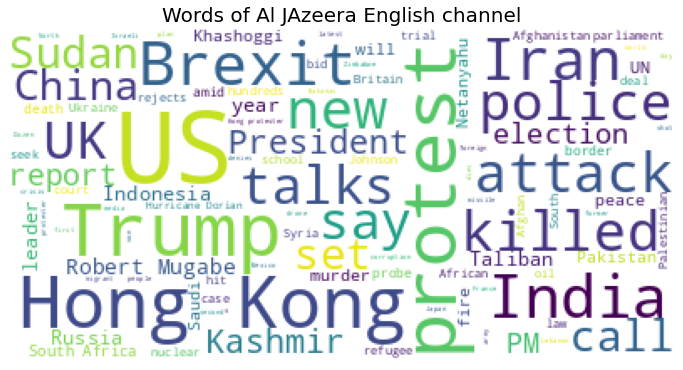

In [65]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='Al Jazeera English','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of Al JAzeera English channel",fontsize=20)
plt.show()

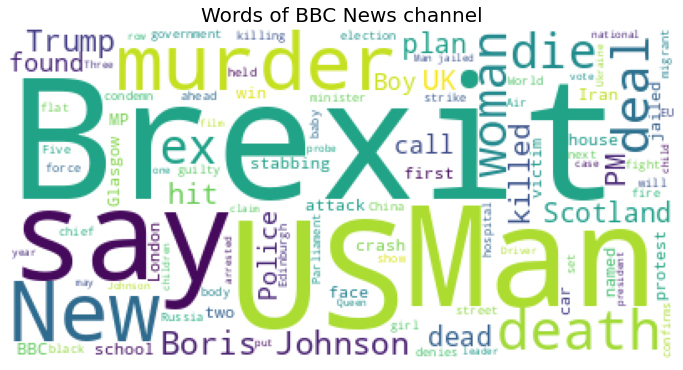

In [66]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='BBC News','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of BBC News channel",fontsize=20)
plt.show()

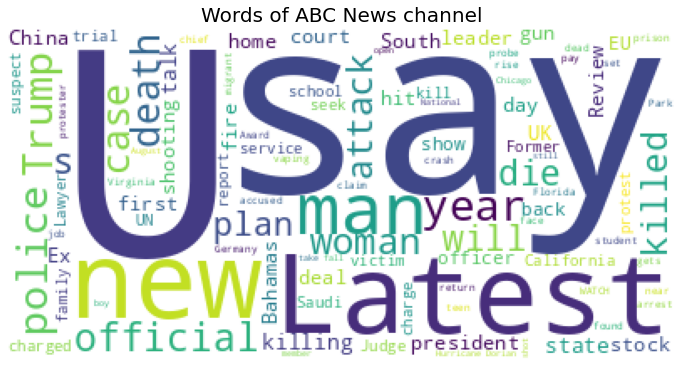

In [67]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='ABC News','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of ABC News channel",fontsize=20)
plt.show()

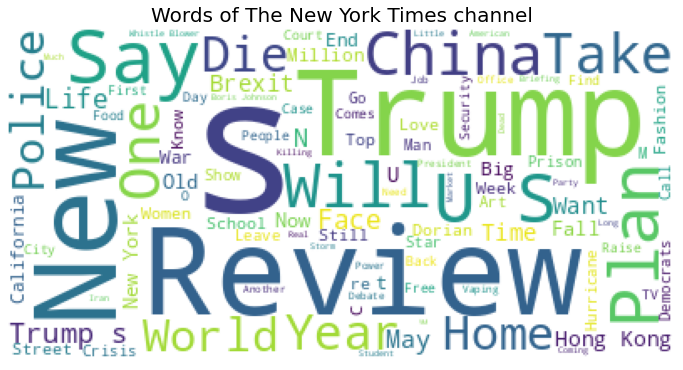

In [68]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='The New York Times','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of The New York Times channel",fontsize=20)
plt.show()

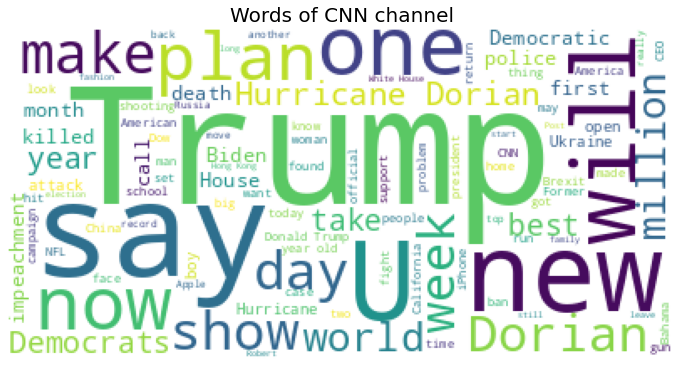

In [69]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='CNN','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of CNN channel",fontsize=20)
plt.show()

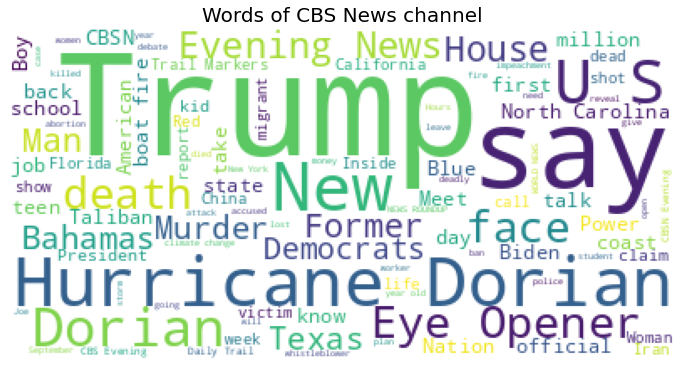

In [70]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='CBS News','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of CBS News channel",fontsize=20)
plt.show()

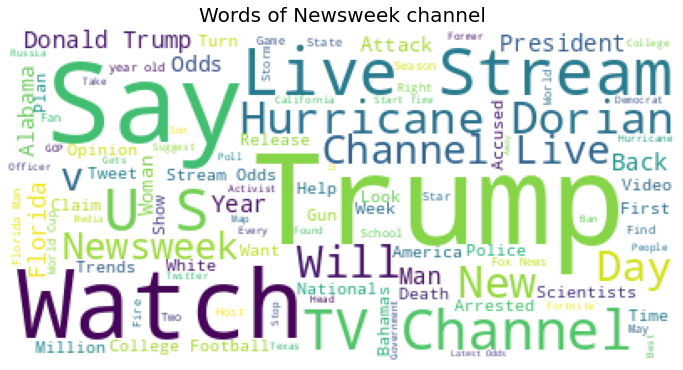

In [72]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='Newsweek','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of Newsweek channel",fontsize=20)
plt.show()

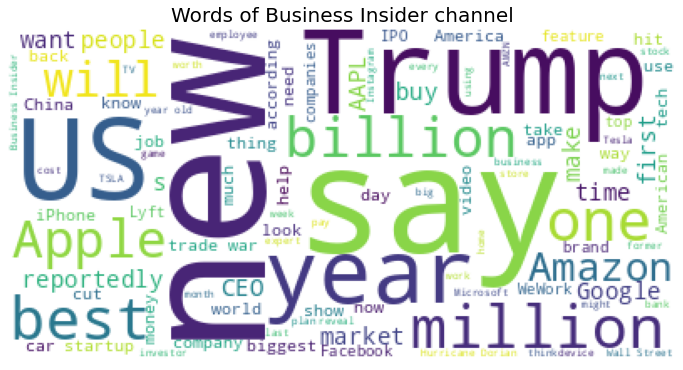

In [73]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='Business Insider','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of Business Insider channel",fontsize=20)
plt.show()

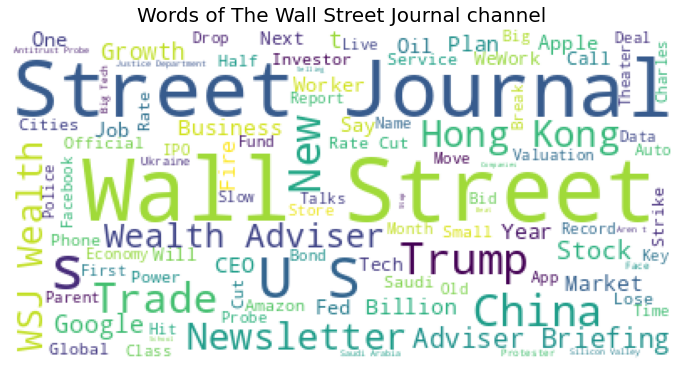

In [74]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='The Wall Street Journal','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of The Wall Street Journal channel",fontsize=20)
plt.show()

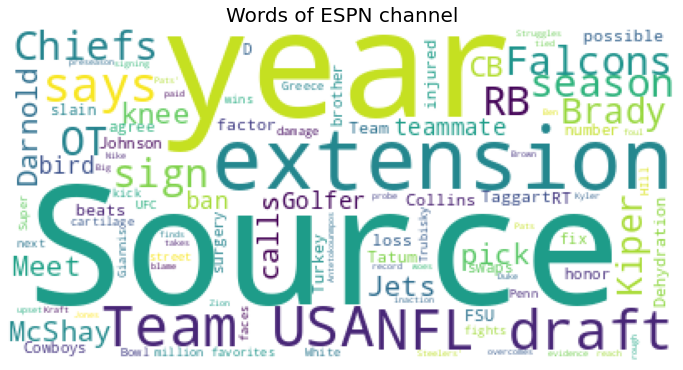

In [75]:
w=WordCloud(background_color='white',max_words=100)
w.generate(' '.join(text for text in df.loc[df['source_name']=='ESPN','title']))
plt.figure(figsize=(12,12))
plt.imshow(w)
plt.axis('off')
plt.title("Words of ESPN channel",fontsize=20)
plt.show()

**Conclusion:**             
* **CNN** channel has highest **comments,reactions** counts among all the other channels.      
* **Reuters** channel has highest **Share** count among all the other channels        
* **Business Insider** has highest **comment_plugin_count** count among all the other channel       
* **ESPN** has **Zero** counts in all the categories       
